In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv(r'/Users/sankar/Downloads/heartfailure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df1=df.drop(["anaemia","creatinine_phosphokinase","ejection_fraction","high_blood_pressure","serum_creatinine","serum_sodium","smoking"],axis="columns")

In [4]:
df1

,age,diabetes,platelets,sex,time,DEATH_EVENT
0,75.0,0,265000.00,1,4,1
1,55.0,0,263358.03,1,6,1
2,65.0,0,162000.00,1,7,1
3,50.0,0,210000.00,1,7,1
4,65.0,1,327000.00,0,8,1
...,...,...,...,...,...,...
294,62.0,1,155000.00,1,270,0
295,55.0,0,270000.00,0,271,0
296,45.0,1,742000.00,0,278,0
297,45.0,0,140000.00,1,280,0


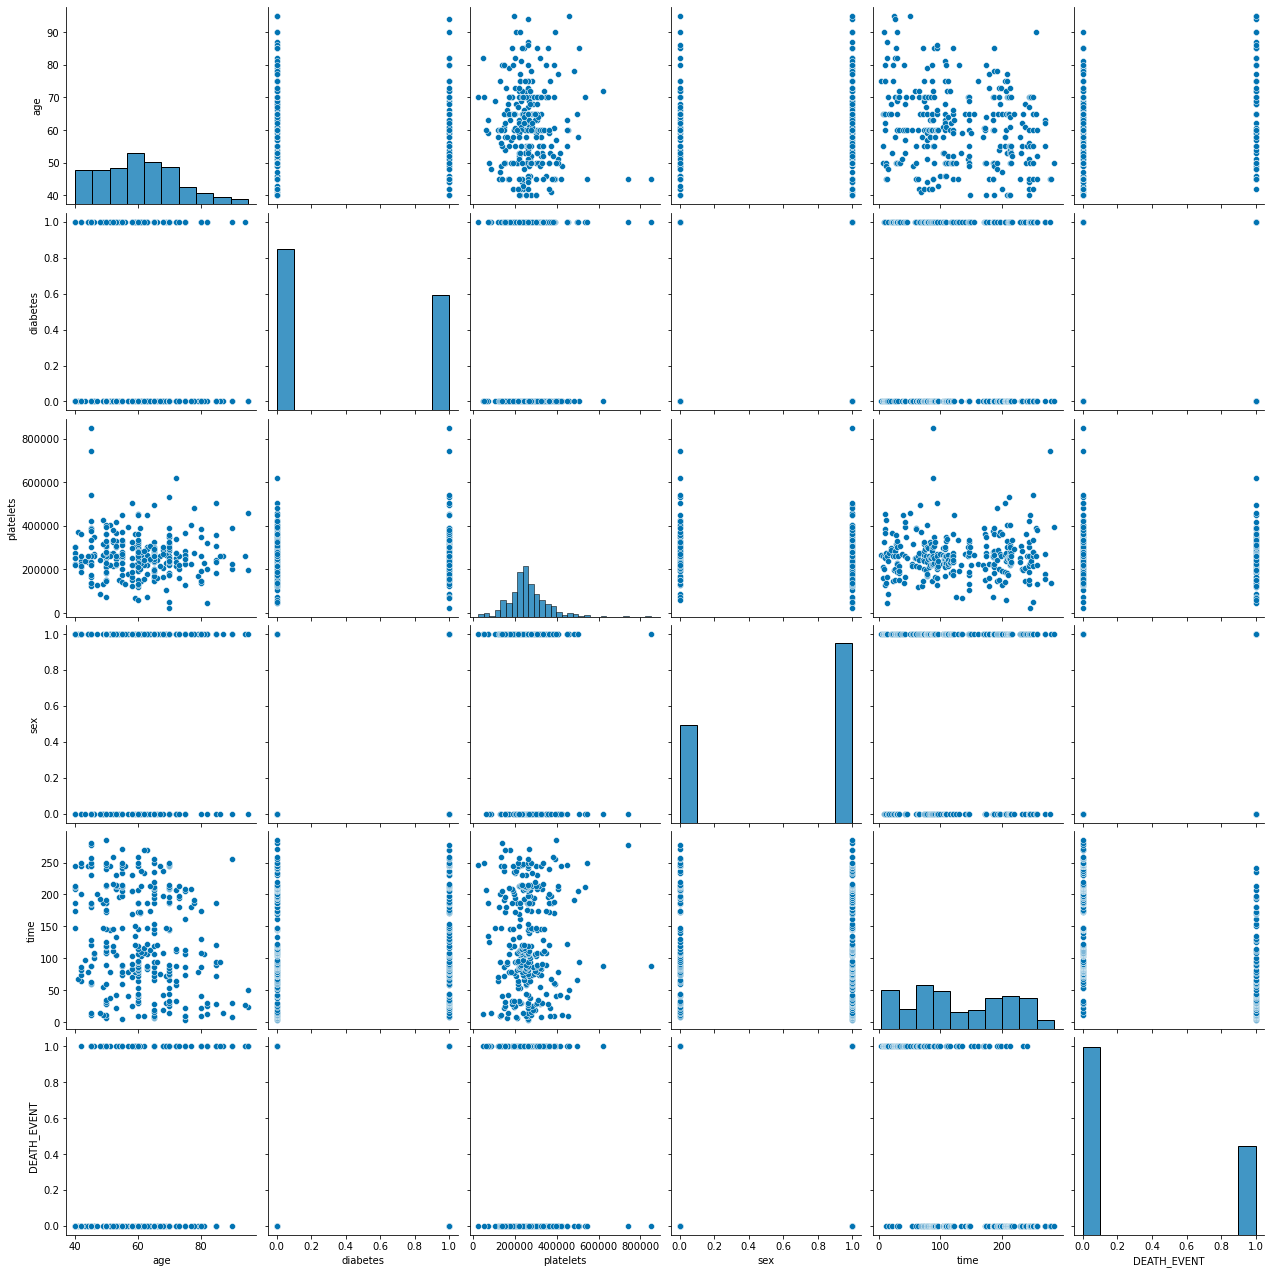

In [5]:
sns.set_palette('colorblind')
sns.pairplot(data=df1, height=3)

In [60]:
reg = linear_model.LinearRegression()
reg.fit(df1.drop('DEATH_EVENT',axis='columns').values,df1.DEATH_EVENT)

LinearRegression()

In [61]:
reg.coef_

array([ 5.70061944e-03,  2.81951457e-02, -2.00101780e-07, -2.15897131e-02,
       -2.98498125e-03])

In [8]:
reg.intercept_

0.4180247984761175

In [62]:
reg.predict([[80,1,500000,1,59]])

array([0.604515])

In [10]:
####logistic
%matplotlib inline

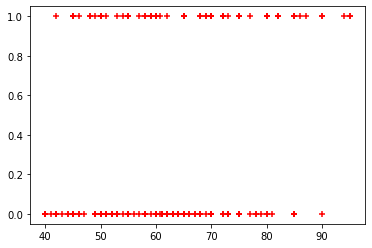

In [11]:
plt.scatter(df.age,df.DEATH_EVENT,marker='+',color='red')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.DEATH_EVENT,train_size=0.8)

In [14]:
X_test

,age
246,55.000
178,63.000
218,68.000
235,77.000
116,60.000
9,80.000
157,50.000
291,60.000
216,70.000
169,70.000


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [55]:
model.fit(X_train.values,y_train)

RandomForestClassifier(n_estimators=20)

In [57]:
y_predicted=model.predict(X_test.values)

In [18]:
model.predict_proba(X_test)

array([[0.76745057, 0.23254943],
       [0.68360994, 0.31639006],
       [0.62379484, 0.37620516],
       [0.50729505, 0.49270495],
       [0.71692239, 0.28307761],
       [0.46763219, 0.53236781],
       [0.81133316, 0.18866684],
       [0.71692239, 0.28307761],
       [0.59863888, 0.40136112],
       [0.59863888, 0.40136112],
       [0.28417878, 0.71582122],
       [0.76745057, 0.23254943],
       [0.5337168 , 0.4662832 ],
       [0.85524753, 0.14475247],
       [0.76745057, 0.23254943],
       [0.84163926, 0.15836074],
       [0.28417878, 0.71582122],
       [0.81133316, 0.18866684],
       [0.84856894, 0.15143106],
       [0.81133316, 0.18866684],
       [0.69494839, 0.30505161],
       [0.81133316, 0.18866684],
       [0.6602754 , 0.3397246 ],
       [0.87382394, 0.12617606],
       [0.84856894, 0.15143106],
       [0.73791049, 0.26208951],
       [0.49405961, 0.50594039],
       [0.83445433, 0.16554567],
       [0.78581162, 0.21418838],
       [0.84856894, 0.15143106],
       [0.

In [58]:
model.score(X_test.values,y_test)

0.6333333333333333

In [20]:
y_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
model.predict([[50]])

array([0])

In [22]:
model.coef_

array([[0.05294495]])

In [23]:
model.intercept_

array([-4.10594377])

In [24]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [25]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [26]:
age=50
prediction_function(age)

0.6387631751488418

In [27]:
###decision tree

In [28]:
df1

,age,diabetes,platelets,sex,time,DEATH_EVENT
0,75.0,0,265000.00,1,4,1
1,55.0,0,263358.03,1,6,1
2,65.0,0,162000.00,1,7,1
3,50.0,0,210000.00,1,7,1
4,65.0,1,327000.00,0,8,1
...,...,...,...,...,...,...
294,62.0,1,155000.00,1,270,0
295,55.0,0,270000.00,0,271,0
296,45.0,1,742000.00,0,278,0
297,45.0,0,140000.00,1,280,0


In [29]:
inputs=df1.drop('DEATH_EVENT',axis="columns")

In [30]:
target=df1["DEATH_EVENT"]

In [31]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()

In [51]:
model1.fit(inputs.values,target)

DecisionTreeClassifier()

In [52]:
model1.score(inputs.values,target)

1.0

In [53]:
model1.predict([[70,1,500000,1,200]])

array([0])

In [35]:
####randomforest
df1

,age,diabetes,platelets,sex,time,DEATH_EVENT
0,75.0,0,265000.00,1,4,1
1,55.0,0,263358.03,1,6,1
2,65.0,0,162000.00,1,7,1
3,50.0,0,210000.00,1,7,1
4,65.0,1,327000.00,0,8,1
...,...,...,...,...,...,...
294,62.0,1,155000.00,1,270,0
295,55.0,0,270000.00,0,271,0
296,45.0,1,742000.00,0,278,0
297,45.0,0,140000.00,1,280,0


In [36]:
x=df1[["age","diabetes","platelets"]]
y=df1[["DEATH_EVENT"]]

In [37]:
x

,age,diabetes,platelets
0,75.0,0,265000.00
1,55.0,0,263358.03
2,65.0,0,162000.00
3,50.0,0,210000.00
4,65.0,1,327000.00
...,...,...,...
294,62.0,1,155000.00
295,55.0,0,270000.00
296,45.0,1,742000.00
297,45.0,0,140000.00


In [38]:
x=x[["age","diabetes","platelets"]]
x

,age,diabetes,platelets
0,75.0,0,265000.00
1,55.0,0,263358.03
2,65.0,0,162000.00
3,50.0,0,210000.00
4,65.0,1,327000.00
...,...,...,...
294,62.0,1,155000.00
295,55.0,0,270000.00
296,45.0,1,742000.00
297,45.0,0,140000.00


In [39]:
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x.values,np.ravel(y))

RandomForestClassifier(n_estimators=20)

In [49]:
model.score(x.values,y)

0.9632107023411371

In [50]:
model.predict([[75,0,265000]])

array([1])